In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf 
import pickle
import matplotlib.pyplot as plt
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2

In [ ]:

upload = files.upload()

Saving data.pickle to data.pickle


In [ ]:
with open("data.pickle","rb") as f:
  (X_train, Y_train)=pickle.load(f)

X_train = X_train[:169]
Y_train = Y_train[:169]
print(Y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:

X_train = X_train.reshape(X_train.shape[0],-1)

#preprocesing Data
X_train = X_train.astype('float32')
X_train /= 255
#Encoding Y
Y_train = np_utils.to_categorical(Y_train,3)

#shuffle Data
X_train, Y_train = shuffle(X_train,Y_train)

#tạo mô hình 
model = Sequential()
model.add(Dense(10, activation='relu',input_shape=(67500,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',optimizer = Adam(),metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size = 32, epochs=50,  validation_split=0.2)



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 10)                675010    
                                                                 
 dense_46 (Dense)            (None, 10)                110       
                                                                 
 dense_47 (Dense)            (None, 10)                110       
                                                                 
 dense_48 (Dense)            (None, 10)                110       
                                                                 
 dense_49 (Dense)            (None, 10)                110       
                                                                 
 dense_50 (Dense)            (None, 10)                110       
                                                                 
 dense_51 (Dense)            (None, 10)               

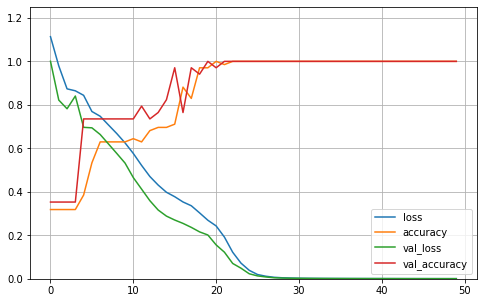

In [64]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1.25)
plt.show()


In [ ]:
from google.colab import files
upload = files.upload()

Saving BanPhuc_06.jpg to BanPhuc_06.jpg


là bạn Phúc


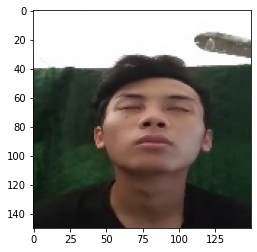

In [ ]:
from keras import models
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

img = load_img('BanPhuc_06.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,-1)
img = img.astype('float32')
img = img/ 255
if np.argmax(model.predict(img),axis=1) == 1:
  print("là bạn Trường")
if np.argmax(model.predict(img),axis=1) == 0:
  print("là bạn Phúc")
if np.argmax(model.predict(img),axis=1) == 2:
  print("là bạn Vương")